# AxionRay Data Analytics Assignment
## Task 1: Data Validation

**Author:** Data Analyst  
**Date:** October 2025  
**Description:** Comprehensive data validation, cleaning, and analysis

---

## 1. Import Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Data

In [45]:
# Load both sheets from Task 1 data file
print("Loading datasets...\n")

df_main = pd.read_excel('C:\\Users\\DELL\\Downloads\\SA - Data for Task 1.xlsx', sheet_name='Sheet1')
df_causal = pd.read_excel('C:\\Users\\DELL\\Downloads\\SA - Data for Task 1.xlsx', sheet_name='Sheet2')

print(f"Main dataset shape: {df_main.shape}")
print(f"Causal verbatim dataset shape: {df_causal.shape}")
print(f"\nMain dataset columns ({len(df_main.columns)}):\n{list(df_main.columns)}")
print(f"\nCausal dataset columns: {list(df_causal.columns)}")

Loading datasets...

Main dataset shape: (100, 52)
Causal verbatim dataset shape: (1000, 2)

Main dataset columns (52):
['VIN', 'TRANSACTION_ID', 'CORRECTION_VERBATIM', 'CUSTOMER_VERBATIM', 'REPAIR_DATE', 'CAUSAL_PART_NM', 'GLOBAL_LABOR_CODE_DESCRIPTION', 'PLATFORM', 'BODY_STYLE', 'VPPC', 'PLANT', 'BUILD_COUNTRY', 'LAST_KNOWN_DLR_NAME', 'LAST_KNOWN_DLR_CITY', 'REPAIRING_DEALER_CODE', 'DEALER_NAME', 'REPAIR_DLR_CITY', 'STATE', 'DEALER_REGION', 'REPAIR_DLR_POSTAL_CD', 'REPAIR_AGE', 'KM', 'COMPLAINT_CD_CSI', 'COMPLAINT_CD', 'VEH_TEST_GRP', 'COUNTRY_SALE_ISO', 'ORD_SELLING_SRC_CD', 'OPTN_FAMLY_CERTIFICATION', 'OPTF_FAMLY_EMISSIOF_SYSTEM', 'GLOBAL_LABOR_CODE', 'TRANSACTION_CATEGORY', 'CAMPAIGN_NBR', 'REPORTING_COST', 'TOTALCOST', 'LBRCOST', 'ENGINE', 'ENGINE_DESC', 'TRANSMISSION', 'TRANSMISSION_DESC', 'ENGINE_SOURCE_PLANT', 'ENGINE_TRACE_NBR', 'TRANSMISSION_SOURCE_PLANT', 'TRANSMISSION_TRACE_NBR', 'SRC_TXN_ID', 'SRC_VER_NBR', 'TRANSACTION_CNTR', 'MEDIA_FLAG', 'VIN_MODL_DESGTR', 'LINE_SERIES

In [46]:
# Display first few rows
print("First 3 rows of main dataset:\n")
display(df_main.head(3))

print("\nFirst 3 rows of causal verbatim dataset:\n")
display(df_causal.head(3))

First 3 rows of main dataset:



,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,PLANT,BUILD_COUNTRY,LAST_KNOWN_DLR_NAME,LAST_KNOWN_DLR_CITY,REPAIRING_DEALER_CODE,DEALER_NAME,REPAIR_DLR_CITY,STATE,DEALER_REGION,REPAIR_DLR_POSTAL_CD,REPAIR_AGE,KM,COMPLAINT_CD_CSI,COMPLAINT_CD,VEH_TEST_GRP,COUNTRY_SALE_ISO,ORD_SELLING_SRC_CD,OPTN_FAMLY_CERTIFICATION,OPTF_FAMLY_EMISSIOF_SYSTEM,GLOBAL_LABOR_CODE,TRANSACTION_CATEGORY,CAMPAIGN_NBR,REPORTING_COST,TOTALCOST,LBRCOST,ENGINE,ENGINE_DESC,TRANSMISSION,TRANSMISSION_DESC,ENGINE_SOURCE_PLANT,ENGINE_TRACE_NBR,TRANSMISSION_SOURCE_PLANT,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,SIL,MX,Silverstone Motors,ST JOHNS,13-13992/309484,Apex Auto Sales,ST JOHNS,MI,1,488799101,6,8872,0,0-0310,T03.0354,US,13,FE9,FTB,130,FREG,NaN,370.03,370.03,61.46,LZ0,"DIESEL, 6 CYL, 3.0L, CRI, L6, DOHC, TURBO, VGT...",MQC,"BYT 10 SPD, 10L80, ATSS, ETRS, CPA, GEN 2",70628511,V2210281MFTX0488,287827.0,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,FTW,US,Elite Auto Group,FISHERS,13-14819/243038,SilverPeak Motors,GRAND RAPIDS,MN,1,557444215,5,16346,0,0-0310,T03.0354,US,48,FE9,FTB,2400,FREG,NaN,307.32,307.32,291.14,LZ0,"DIESEL, 6 CYL, 3.0L, CRI, L6, DOHC, TURBO, VGT...",MQC,"BYT 10 SPD, 10L80, ATSS, ETRS, CPA, GEN 2",70628511,V2210291MFTX0188,17749294.0,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,SHT,US,CrossRoads Dealership,SAN DIEGO,11-46466/119152,Quantum Car Traders,SAN DIEGO,CA,1,921083521,9,8887,0,0-0310,T00.0006,US,12,YF5,FF6,130,FREG,NaN,2457.45,3205.45,1012.67,EN0,NONE,MF1,NONE,NaN,NaN,NaN,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1



First 3 rows of causal verbatim dataset:



,TRANSACTION_ID,CAUSAL_VERBATIM
0,1306797194,STITCHING COMING LOOSE
1,1311801388,STEERING WHEEL LIGHT CRACKED
2,1321858065,INSPECT AND FOUND THE STEERING WHEEL DELAMINAT...


## 3. Column-Wise Analysis

In [47]:
def perform_column_analysis(df):
    """Comprehensive column-wise analysis"""
    print("=" * 80)
    print("COLUMN-WISE ANALYSIS")
    print("=" * 80)
    
    analysis_results = []
    
    for col in df.columns:
        col_info = {
            'Column Name': col,
            'Data Type': str(df[col].dtype),
            'Total Records': len(df),
            'Non-Null Count': df[col].notna().sum(),
            'Null Count': df[col].isna().sum(),
            'Null Percentage': round(df[col].isna().sum() / len(df) * 100, 2),
            'Unique Values': df[col].nunique(),
            'Sample Values': str(df[col].dropna().head(2).tolist())[:100]
        }
        analysis_results.append(col_info)
        
        # Print summary
        print(f"\n{col}:")
        print(f"  Type: {col_info['Data Type']}")
        print(f"  Null: {col_info['Null Count']} ({col_info['Null Percentage']}%)")
        print(f"  Unique: {col_info['Unique Values']}")
    
    return pd.DataFrame(analysis_results)

# Perform analysis
column_analysis = perform_column_analysis(df_main)

COLUMN-WISE ANALYSIS

VIN:
  Type: object
  Null: 0 (0.0%)
  Unique: 98

TRANSACTION_ID:
  Type: int64
  Null: 0 (0.0%)
  Unique: 32

CORRECTION_VERBATIM:
  Type: object
  Null: 0 (0.0%)
  Unique: 93

CUSTOMER_VERBATIM:
  Type: object
  Null: 0 (0.0%)
  Unique: 100

REPAIR_DATE:
  Type: datetime64[ns]
  Null: 0 (0.0%)
  Unique: 29

CAUSAL_PART_NM:
  Type: object
  Null: 5 (5.0%)
  Unique: 18

GLOBAL_LABOR_CODE_DESCRIPTION:
  Type: object
  Null: 0 (0.0%)
  Unique: 4

PLATFORM:
  Type: object
  Null: 0 (0.0%)
  Unique: 11

BODY_STYLE:
  Type: object
  Null: 0 (0.0%)
  Unique: 6

VPPC:
  Type: object
  Null: 0 (0.0%)
  Unique: 26

PLANT:
  Type: object
  Null: 1 (1.0%)
  Unique: 11

BUILD_COUNTRY:
  Type: object
  Null: 0 (0.0%)
  Unique: 3

LAST_KNOWN_DLR_NAME:
  Type: object
  Null: 0 (0.0%)
  Unique: 100

LAST_KNOWN_DLR_CITY:
  Type: object
  Null: 0 (0.0%)
  Unique: 94

REPAIRING_DEALER_CODE:
  Type: object
  Null: 0 (0.0%)
  Unique: 95

DEALER_NAME:
  Type: object
  Null: 0 (0.0%)
 

In [48]:
# Display column analysis summary
display(column_analysis)

# Save to CSV
column_analysis.to_csv('C:\\Users\\DELL\\Downloads\\task1_column_analysis.csv', index=False)
print("\n✓ Column analysis saved to: task1_column_analysis.csv")

,Column Name,Data Type,Total Records,Non-Null Count,Null Count,Null Percentage,Unique Values,Sample Values
0,VIN,object,100,100,0,0.0,98,"['3HCFDDE89SH220903', '1HRFFEE8XSZ230636']"
1,TRANSACTION_ID,int64,100,100,0,0.0,32,"[13021, 13028]"
2,CORRECTION_VERBATIM,object,100,100,0,0.0,93,"['REPLACED STEERING WHEEL NOW OKAY', ""CHECKED ..."
3,CUSTOMER_VERBATIM,object,100,100,0,0.0,100,"['STEERING WHEEL COMING APART', 'CUSTOMER STAT..."
4,REPAIR_DATE,datetime64[ns],100,100,0,0.0,29,"[Timestamp('2024-01-02 00:00:00'), Timestamp('..."
5,CAUSAL_PART_NM,object,100,95,5,5.0,18,"['WHEEL ASM-STRG *JET BLACK', 'MODULE ASM-STRG..."
6,GLOBAL_LABOR_CODE_DESCRIPTION,object,100,100,0,0.0,4,"['Steering Wheel Replacement', 'Heated Steerin..."
7,PLATFORM,object,100,100,0,0.0,11,"['Full-Size Trucks', 'Full-Size Trucks']"
8,BODY_STYLE,object,100,100,0,0.0,6,"['Crew Cab', 'Crew Cab']"
9,VPPC,object,100,100,0,0.0,26,"['T1CCF', 'T1CGF']"



✓ Column analysis saved to: task1_column_analysis.csv


## 4. Data Cleaning

In [49]:
def clean_data(df_main, df_causal):
    """Comprehensive data cleaning"""
    print("=" * 80)
    print("DATA CLEANING")
    print("=" * 80)
    
    df_clean = df_main.copy()
    
    # 1. Handle date columns
    print("\n1. Converting date columns...")
    df_clean['REPAIR_DATE'] = pd.to_datetime(df_clean['REPAIR_DATE'], errors='coerce')
    
    # 2. Handle numerical columns
    print("2. Cleaning numerical columns...")
    numerical_cols = ['REPAIR_AGE', 'KM', 'REPORTING_COST', 'TOTALCOST', 'LBRCOST']
    for col in numerical_cols:
        if col in df_clean.columns:
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    
    # 3. Handle categorical columns - standardize
    print("3. Standardizing categorical columns...")
    categorical_cols = ['PLATFORM', 'BODY_STYLE', 'BUILD_COUNTRY', 'STATE', 
                       'CAUSAL_PART_NM', 'GLOBAL_LABOR_CODE_DESCRIPTION']
    
    for col in categorical_cols:
        if col in df_clean.columns:
            # Strip whitespace and standardize case
            df_clean[col] = df_clean[col].astype(str).str.strip().str.upper()
            # Replace 'NAN' string with actual NaN
            df_clean[col] = df_clean[col].replace('NAN', np.nan)
    
    # 4. Handle missing values in critical columns
    print("4. Handling missing values...")
    
    # For VIN - drop if missing (primary identifier)
    initial_rows = len(df_clean)
    df_clean = df_clean.dropna(subset=['VIN'])
    print(f"   Removed {initial_rows - len(df_clean)} rows with missing VIN")
    
    # For TRANSACTION_ID - keep but flag
    df_clean['MISSING_TRANSACTION_ID'] = df_clean['TRANSACTION_ID'].isna()
    
    # Fill missing costs with 0 (assuming no cost if not recorded)
    cost_cols = ['REPORTING_COST', 'TOTALCOST', 'LBRCOST']
    for col in cost_cols:
        if col in df_clean.columns:
            df_clean[col].fillna(0, inplace=True)
    
    # 5. Handle outliers in numerical columns
    print("5. Handling outliers...")
    
    # Remove negative ages (impossible)
    if 'REPAIR_AGE' in df_clean.columns:
        df_clean.loc[df_clean['REPAIR_AGE'] < 0, 'REPAIR_AGE'] = np.nan
    
    # Remove negative costs
    for col in cost_cols:
        if col in df_clean.columns:
            df_clean.loc[df_clean[col] < 0, col] = 0
    
    # Cap extreme KM values (likely errors)
    if 'KM' in df_clean.columns:
        q99 = df_clean['KM'].quantile(0.99)
        df_clean.loc[df_clean['KM'] > q99 * 3, 'KM'] = np.nan
    
    # 6. Remove exact duplicates
    print("6. Removing duplicates...")
    initial_rows = len(df_clean)
    df_clean = df_clean.drop_duplicates()
    print(f"   Removed {initial_rows - len(df_clean)} duplicate rows")
    
    # 7. Merge with causal verbatim data
    print("7. Merging causal verbatim data...")
    df_causal_clean = df_causal.copy()
    df_causal_clean['TRANSACTION_ID'] = df_causal_clean['TRANSACTION_ID'].astype(float)
    
    df_final = df_clean.merge(
        df_causal_clean, 
        on='TRANSACTION_ID', 
        how='left',
        suffixes=('', '_causal')
    )
    
    print(f"\nFinal cleaned dataset shape: {df_final.shape}")
    print(f"\nCleaning Summary:")
    print(f"  - Initial rows: {len(df_main)}")
    print(f"  - Final rows: {len(df_final)}")
    print(f"  - Rows removed: {len(df_main) - len(df_final)}")
    
    return df_final

# Perform cleaning
df_clean = clean_data(df_main, df_causal)

DATA CLEANING

1. Converting date columns...
2. Cleaning numerical columns...
3. Standardizing categorical columns...
4. Handling missing values...
   Removed 0 rows with missing VIN
5. Handling outliers...
6. Removing duplicates...
   Removed 0 duplicate rows
7. Merging causal verbatim data...

Final cleaned dataset shape: (100, 54)

Cleaning Summary:
  - Initial rows: 100
  - Final rows: 100
  - Rows removed: 0


In [50]:
# Display cleaned data summary
print("Cleaned dataset info:")
print(f"Shape: {df_clean.shape}")
print(f"\nNull values per column:")
display(df_clean.isnull().sum()[df_clean.isnull().sum() > 0].sort_values(ascending=False))

Cleaned dataset info:
Shape: (100, 54)

Null values per column:


CAMPAIGN_NBR                  100
CAUSAL_VERBATIM               100
ENGINE_SOURCE_PLANT            12
ENGINE_TRACE_NBR               12
TRANSMISSION_SOURCE_PLANT      12
TRANSMISSION_TRACE_NBR         12
OPTN_FAMLY_CERTIFICATION       10
CAUSAL_PART_NM                  5
OPTF_FAMLY_EMISSIOF_SYSTEM      5
STATE                           2
REPAIR_DLR_POSTAL_CD            2
VEH_TEST_GRP                    2
LAST_KNOWN_DELVRY_TYPE_CD       2
PLANT                           1
LINE_SERIES                     1
dtype: int64

## 5. Identify Critical Columns

In [51]:
def identify_critical_columns(df):
    """Identify top 5 critical columns for stakeholder insights"""
    print("=" * 80)
    print("TOP 5 CRITICAL COLUMNS FOR STAKEHOLDER INSIGHTS")
    print("=" * 80)
    
    critical_columns = {
        'CAUSAL_PART_NM': 'Identifies which parts are failing most frequently',
        'GLOBAL_LABOR_CODE_DESCRIPTION': 'Shows types of repairs being performed',
        'TOTALCOST': 'Indicates financial impact of repairs',
        'REPAIR_AGE': 'Reveals when failures occur in vehicle lifecycle',
        'PLATFORM': 'Identifies which vehicle platforms have most issues'
    }
    
    print("\nSelected Critical Columns:\n")
    for i, (col, reason) in enumerate(critical_columns.items(), 1):
        print(f"{i}. {col}")
        print(f"   Reasoning: {reason}")
        if col in df.columns:
            print(f"   Unique values: {df[col].nunique()}")
            print(f"   Missing: {df[col].isna().sum()} ({df[col].isna().sum()/len(df)*100:.1f}%)")
        print()
    
    return critical_columns

# Identify critical columns
critical_cols = identify_critical_columns(df_clean)

TOP 5 CRITICAL COLUMNS FOR STAKEHOLDER INSIGHTS

Selected Critical Columns:

1. CAUSAL_PART_NM
   Reasoning: Identifies which parts are failing most frequently
   Unique values: 18
   Missing: 5 (5.0%)

2. GLOBAL_LABOR_CODE_DESCRIPTION
   Reasoning: Shows types of repairs being performed
   Unique values: 4
   Missing: 0 (0.0%)

3. TOTALCOST
   Reasoning: Indicates financial impact of repairs
   Unique values: 100
   Missing: 0 (0.0%)

4. REPAIR_AGE
   Reasoning: Reveals when failures occur in vehicle lifecycle
   Unique values: 35
   Missing: 0 (0.0%)

5. PLATFORM
   Reasoning: Identifies which vehicle platforms have most issues
   Unique values: 11
   Missing: 0 (0.0%)



## 6. Generate Visualizations

In [52]:
# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("=" * 80)
print("GENERATING VISUALIZATIONS")
print("=" * 80)

GENERATING VISUALIZATIONS



1. Top Failing Parts



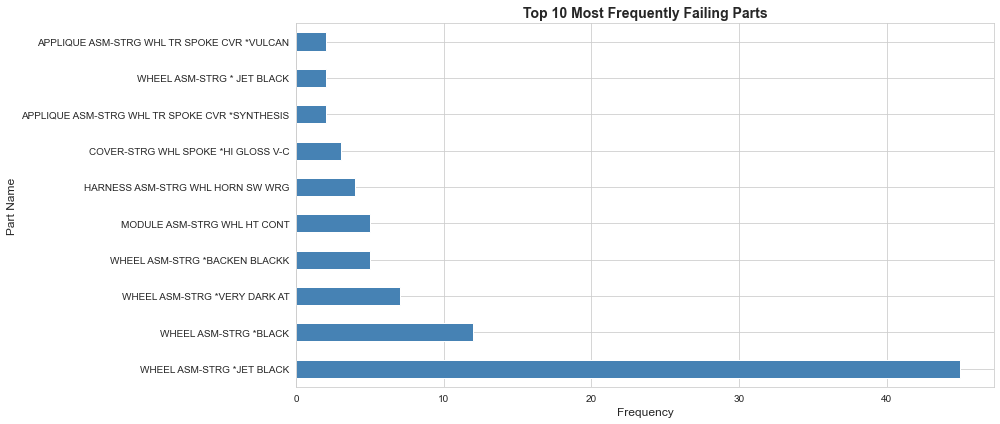

✓ Saved: viz1_top_failing_parts.png


In [53]:
# Visualization 1: Top 10 Failing Parts
print("\n1. Top Failing Parts\n")

plt.figure(figsize=(14, 6))
top_parts = df_clean['CAUSAL_PART_NM'].value_counts().head(10)
top_parts.plot(kind='barh', color='steelblue')
plt.title('Top 10 Most Frequently Failing Parts', fontsize=14, fontweight='bold')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Part Name', fontsize=12)
plt.tight_layout()
plt.savefig('C:\\Users\\DELL\\Downloads\\viz1_top_failing_parts.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: viz1_top_failing_parts.png")


2. Repair Cost Distribution



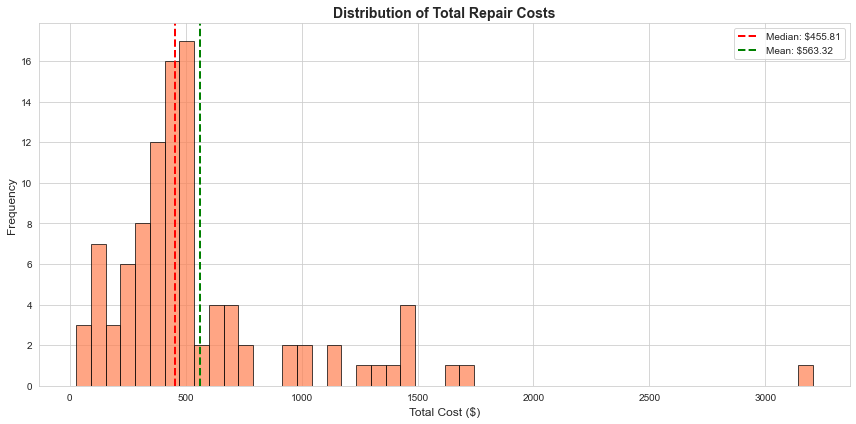

✓ Saved: viz2_cost_distribution.png


In [54]:
# Visualization 2: Repair Cost Distribution
print("\n2. Repair Cost Distribution\n")

plt.figure(figsize=(12, 6))
cost_data = df_clean[df_clean['TOTALCOST'] > 0]['TOTALCOST']
plt.hist(cost_data, bins=50, color='coral', edgecolor='black', alpha=0.7)
plt.axvline(cost_data.median(), color='red', linestyle='--', 
            linewidth=2, label=f'Median: ${cost_data.median():.2f}')
plt.axvline(cost_data.mean(), color='green', linestyle='--', 
            linewidth=2, label=f'Mean: ${cost_data.mean():.2f}')
plt.title('Distribution of Total Repair Costs', fontsize=14, fontweight='bold')
plt.xlabel('Total Cost ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()
plt.savefig('C:\\Users\\DELL\\Downloads\\viz2_cost_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: viz2_cost_distribution.png")


3. Vehicle Age at Repair



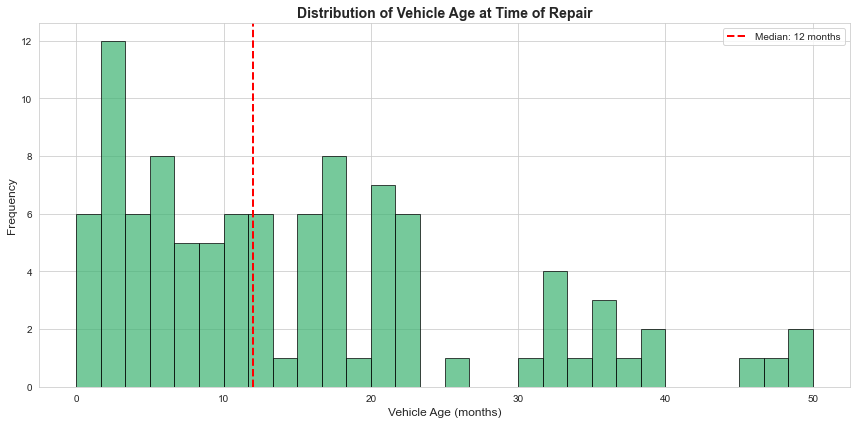

✓ Saved: viz3_repair_age_distribution.png


In [55]:
# Visualization 3: Repair Age Analysis
print("\n3. Vehicle Age at Repair\n")

plt.figure(figsize=(12, 6))
age_data = df_clean[df_clean['REPAIR_AGE'].notna() & (df_clean['REPAIR_AGE'] >= 0)]['REPAIR_AGE']
plt.hist(age_data, bins=30, color='mediumseagreen', edgecolor='black', alpha=0.7)
plt.axvline(age_data.median(), color='red', linestyle='--', 
            linewidth=2, label=f'Median: {age_data.median():.0f} months')
plt.title('Distribution of Vehicle Age at Time of Repair', fontsize=14, fontweight='bold')
plt.xlabel('Vehicle Age (months)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()
plt.savefig('C:\\Users\\DELL\\Downloads\\viz3_repair_age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: viz3_repair_age_distribution.png")


4. Issues by Platform



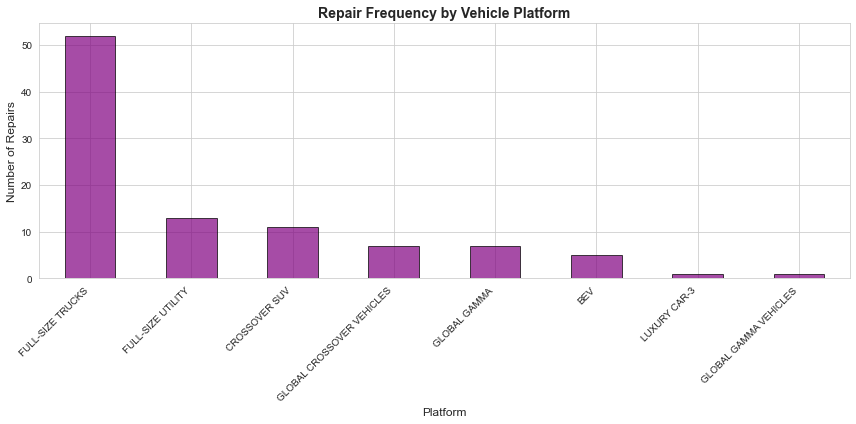

✓ Saved: viz4_platform_issues.png


In [56]:
# Visualization 4: Platform-wise Issue Count
print("\n4. Issues by Platform\n")

plt.figure(figsize=(12, 6))
platform_counts = df_clean['PLATFORM'].value_counts().head(8)
platform_counts.plot(kind='bar', color='purple', alpha=0.7, edgecolor='black')
plt.title('Repair Frequency by Vehicle Platform', fontsize=14, fontweight='bold')
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Number of Repairs', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('C:\\Users\\DELL\\Downloads\\viz4_platform_issues.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: viz4_platform_issues.png")

## 7. Generate Tags from Free Text

In [57]:
def extract_tags_from_text(df):
    """Generate meaningful tags from free text fields"""
    print("=" * 80)
    print("GENERATING TAGS FROM FREE TEXT")
    print("=" * 80)
    
    df_tagged = df.copy()
    
    # Define tag extraction patterns
    failure_keywords = {
        'ELECTRICAL': ['electrical', 'wiring', 'harness', 'short', 'circuit', 'voltage', 
                      'sensor', 'module', 'dtc', 'code'],
        'MECHANICAL': ['mechanical', 'broken', 'cracked', 'worn', 'loose', 'damaged'],
        'WEAR_TEAR': ['peeling', 'delaminating', 'stitching', 'coming apart', 'unraveling', 
                     'bubbles', 'faded'],
        'HEATING': ['heated', 'heater', 'heating', 'temperature', 'temp', 'hot', 'cold'],
        'SOFTWARE': ['programming', 'software', 'update', 'calibration', 'initialization'],
        'SAFETY': ['airbag', 'super cruise', 'driver assist', 'horn'],
        'AESTHETIC': ['finish', 'color', 'appearance', 'leather', 'chrome', 'trim']
    }
    
    def extract_failure_tags(text):
        """Extract failure-related tags from text"""
        if pd.isna(text):
            return []
        
        text_lower = str(text).lower()
        tags = []
        
        for category, keywords in failure_keywords.items():
            if any(keyword in text_lower for keyword in keywords):
                tags.append(category)
        
        return tags if tags else ['UNCLASSIFIED']
    
    def extract_component_tags(text):
        """Extract component mentions"""
        if pd.isna(text):
            return []
        
        text_lower = str(text).lower()
        components = []
        
        component_patterns = [
            'steering wheel', 'module', 'sensor', 'harness', 'wiring',
            'airbag', 'trim', 'cover', 'leather', 'stitching', 'horn'
        ]
        
        for component in component_patterns:
            if component in text_lower:
                components.append(component.upper().replace(' ', '_'))
        
        return components if components else ['GENERAL']
    
    # Apply tag extraction
    print("\nExtracting failure condition tags...")
    df_tagged['FAILURE_TAGS'] = df_tagged['CUSTOMER_VERBATIM'].apply(extract_failure_tags)
    
    print("Extracting component tags...")
    df_tagged['COMPONENT_TAGS'] = df_tagged['CORRECTION_VERBATIM'].apply(extract_component_tags)
    
    print("Extracting causal verbatim tags...")
    if 'CAUSAL_VERBATIM' in df_tagged.columns:
        df_tagged['CAUSAL_TAGS'] = df_tagged['CAUSAL_VERBATIM'].apply(extract_failure_tags)
    
    # Generate tag summary
    print("\nTag Summary:")
    print("-" * 40)
    
    # Failure tags distribution
    all_failure_tags = []
    for tags in df_tagged['FAILURE_TAGS']:
        all_failure_tags.extend(tags)
    
    failure_tag_counts = Counter(all_failure_tags)
    print("\nFailure Tag Distribution:")
    for tag, count in failure_tag_counts.most_common():
        print(f"  {tag}: {count} ({count/len(df_tagged)*100:.1f}%)")
    
    # Component tags distribution
    all_component_tags = []
    for tags in df_tagged['COMPONENT_TAGS']:
        all_component_tags.extend(tags)
    
    component_tag_counts = Counter(all_component_tags)
    print("\nTop Component Tags:")
    for tag, count in component_tag_counts.most_common(10):
        print(f"  {tag}: {count}")
    
    return df_tagged, failure_tag_counts, component_tag_counts

# Generate tags
df_tagged, failure_tags, component_tags = extract_tags_from_text(df_clean)

GENERATING TAGS FROM FREE TEXT

Extracting failure condition tags...
Extracting component tags...
Extracting causal verbatim tags...

Tag Summary:
----------------------------------------

Failure Tag Distribution:
  UNCLASSIFIED: 27 (27.0%)
  WEAR_TEAR: 23 (23.0%)
  HEATING: 23 (23.0%)
  AESTHETIC: 13 (13.0%)
  MECHANICAL: 11 (11.0%)
  SAFETY: 10 (10.0%)
  ELECTRICAL: 5 (5.0%)
  SOFTWARE: 1 (1.0%)

Top Component Tags:
  STEERING_WHEEL: 86
  MODULE: 11
  COVER: 7
  GENERAL: 6
  LEATHER: 6
  HARNESS: 5
  TRIM: 5
  HORN: 3
  STITCHING: 3
  AIRBAG: 3


In [58]:
# Save tag summaries
pd.DataFrame(failure_tags.most_common(), 
             columns=['Tag', 'Count']).to_csv('C:\\Users\\DELL\\Downloads\\task1_failure_tags.csv', index=False)
pd.DataFrame(component_tags.most_common(), 
             columns=['Tag', 'Count']).to_csv('C:\\Users\\DELL\\Downloads\\task1_component_tags.csv', index=False)

print("\n✓ Tag summaries saved:")
print("  - task1_failure_tags.csv")
print("  - task1_component_tags.csv")


✓ Tag summaries saved:
  - task1_failure_tags.csv
  - task1_component_tags.csv


## 8. Key Takeaways and Recommendations

In [59]:
def generate_key_takeaways(df, column_analysis):
    """Generate comprehensive key takeaways"""
    print("=" * 80)
    print("KEY TAKEAWAYS AND RECOMMENDATIONS")
    print("=" * 80)
    
    print("\n1. DATA QUALITY ISSUES:")
    print("-" * 40)
    
    # Identify columns with high missing data
    high_missing = column_analysis[column_analysis['Null Percentage'] > 20]
    if len(high_missing) > 0:
        print(f"   • {len(high_missing)} columns have >20% missing data:")
        for _, row in high_missing.head(5).iterrows():
            print(f"     - {row['Column Name']}: {row['Null Percentage']}% missing")
    
    print("\n2. PRIMARY KEY ANALYSIS:")
    print("-" * 40)
    if 'VIN' in df.columns:
        vin_duplicates = df['VIN'].duplicated().sum()
        print(f"   • VIN duplicates: {vin_duplicates}")
        print(f"   • VIN can serve as primary key: {vin_duplicates == 0}")
    
    if 'TRANSACTION_ID' in df.columns:
        txn_duplicates = df['TRANSACTION_ID'].duplicated().sum()
        print(f"   • TRANSACTION_ID duplicates: {txn_duplicates}")
        print(f"   • TRANSACTION_ID uniqueness: {df['TRANSACTION_ID'].nunique()/len(df)*100:.1f}%")
    
    print("\n3. COST INSIGHTS:")
    print("-" * 40)
    if 'TOTALCOST' in df.columns:
        cost_data = df[df['TOTALCOST'] > 0]['TOTALCOST']
        print(f"   • Average repair cost: ${cost_data.mean():.2f}")
        print(f"   • Median repair cost: ${cost_data.median():.2f}")
        print(f"   • Total repair cost: ${cost_data.sum():.2f}")
        print(f"   • Max repair cost: ${cost_data.max():.2f}")
    
    print("\n4. TOP FAILURE PATTERNS:")
    print("-" * 40)
    if 'CAUSAL_PART_NM' in df.columns:
        top_parts = df['CAUSAL_PART_NM'].value_counts().head(3)
        print("   Top 3 failing parts:")
        for part, count in top_parts.items():
            print(f"     • {part}: {count} incidents")
    
    print("\n5. RECOMMENDATIONS FOR STAKEHOLDERS:")
    print("-" * 40)
    print("   • Focus quality improvement on top 3 failing parts")
    print("   • Investigate cost outliers (repairs >$3000)")
    print("   • Address missing data in critical fields")
    print("   • Implement predictive maintenance for high-age vehicles")
    print("   • Standardize data entry across dealerships")

# Generate takeaways
generate_key_takeaways(df_tagged, column_analysis)

KEY TAKEAWAYS AND RECOMMENDATIONS

1. DATA QUALITY ISSUES:
----------------------------------------
   • 1 columns have >20% missing data:
     - CAMPAIGN_NBR: 100.0% missing

2. PRIMARY KEY ANALYSIS:
----------------------------------------
   • VIN duplicates: 2
   • VIN can serve as primary key: False
   • TRANSACTION_ID duplicates: 68
   • TRANSACTION_ID uniqueness: 32.0%

3. COST INSIGHTS:
----------------------------------------
   • Average repair cost: $563.32
   • Median repair cost: $455.81
   • Total repair cost: $56332.14
   • Max repair cost: $3205.45

4. TOP FAILURE PATTERNS:
----------------------------------------
   Top 3 failing parts:
     • WHEEL ASM-STRG *JET BLACK: 45 incidents
     • WHEEL ASM-STRG *BLACK: 12 incidents
     • WHEEL ASM-STRG *VERY DARK AT: 7 incidents

5. RECOMMENDATIONS FOR STAKEHOLDERS:
----------------------------------------
   • Focus quality improvement on top 3 failing parts
   • Investigate cost outliers (repairs >$3000)
   • Address missi

## 9. Save Final Outputs

In [60]:
# Save cleaned and tagged dataset
df_tagged.to_csv('C:\\Users\\DELL\\Downloads\\task1_cleaned_tagged_data.csv', index=False)
df_tagged.to_excel('C:\\Users\\DELL\\Downloads\\task1_cleaned_tagged_data.xlsx', index=False)

print("=" * 80)
print("TASK 1 COMPLETED SUCCESSFULLY!")
print("=" * 80)
print("\nGenerated files:")
print("  1. task1_column_analysis.csv")
print("  2. task1_cleaned_tagged_data.csv")
print("  3. task1_cleaned_tagged_data.xlsx")
print("  4. task1_failure_tags.csv")
print("  5. task1_component_tags.csv")
print("  6. viz1_top_failing_parts.png")
print("  7. viz2_cost_distribution.png")
print("  8. viz3_repair_age_distribution.png")
print("  9. viz4_platform_issues.png")

TASK 1 COMPLETED SUCCESSFULLY!

Generated files:
  1. task1_column_analysis.csv
  2. task1_cleaned_tagged_data.csv
  3. task1_cleaned_tagged_data.xlsx
  4. task1_failure_tags.csv
  5. task1_component_tags.csv
  6. viz1_top_failing_parts.png
  7. viz2_cost_distribution.png
  8. viz3_repair_age_distribution.png
  9. viz4_platform_issues.png
